In [1]:
import lightkurve as lk
import numpy as np


In [2]:
tpf = lk.search_targetpixelfile('TIC 233095291')

In [3]:
tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 20,2019,TESS-SPOC,1800,233095291,0.0
1,TESS Sector 21,2020,TESS-SPOC,1800,233095291,0.0
2,TESS Sector 23,2020,TESS-SPOC,1800,233095291,0.0
3,TESS Sector 26,2020,TESS-SPOC,1800,233095291,0.0
4,TESS Sector 40,2021,SPOC,120,233095291,0.0


In [4]:
tp = tpf[4].download()

<AxesSubplot:title={'center':'Target ID: 233095291, Cadence: 837503'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

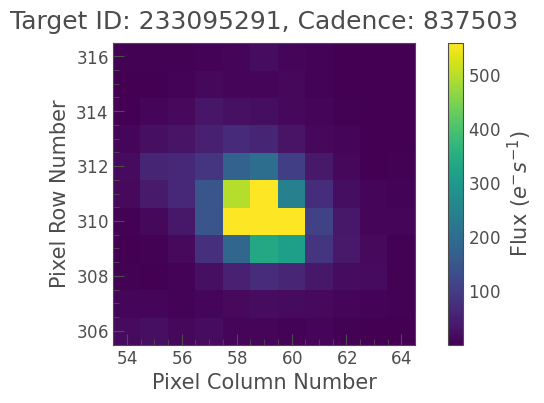

In [5]:
tp.plot()

In [11]:
tp.interact_sky()

In [12]:
import TESS_Localize as tl

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

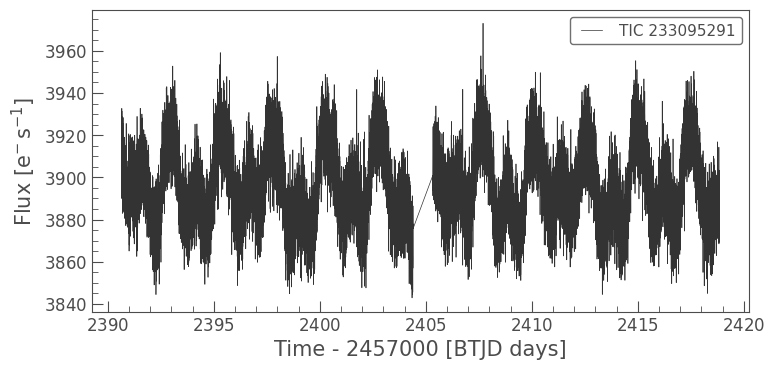

In [16]:
lc = lk.search_lightcurve('TIC 233095291',mission='TESS')[16].download()
lc.plot()

(0.0, 2.0)

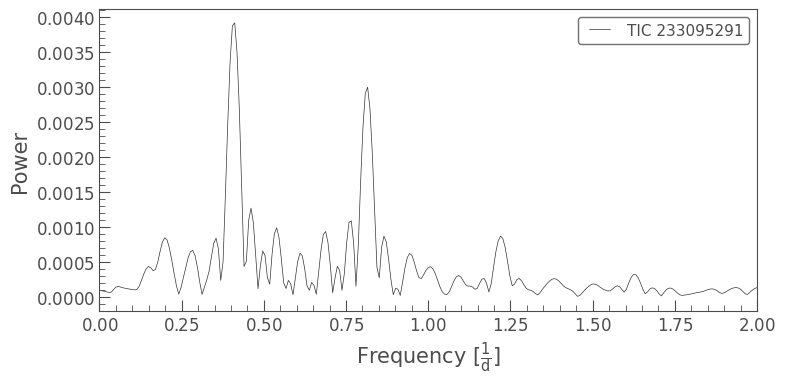

In [35]:
import matplotlib.pyplot as plt
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude')
pgm.plot()
plt.xlim(0,2)

In [36]:
p1 = pgm.period_at_max_power.value

In [37]:
pgm =lc.remove_outliers().normalize().to_periodogram(method="lombscargle", normalization="amplitude", minimum_frequency = .65, maximum_frequency=2)
p2 = pgm.period_at_max_power.value

In [39]:
frequency = [1/p1, 1/p2]

In [47]:
import astropy.units as u
examp = tl.PixelMapFit(targetpixelfile=tp, gaia=True, magnitude_limit=18, frequencies=frequency, frequnit=1/u.day, principal_components = 3)

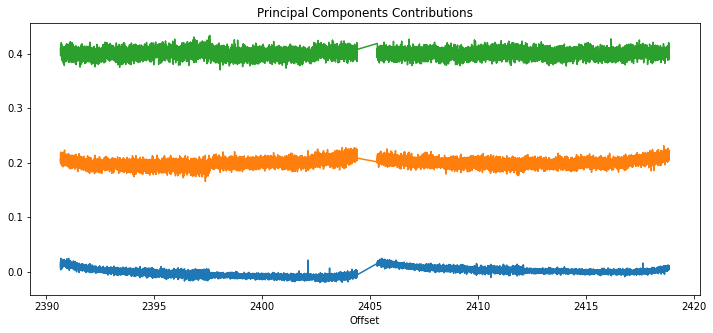

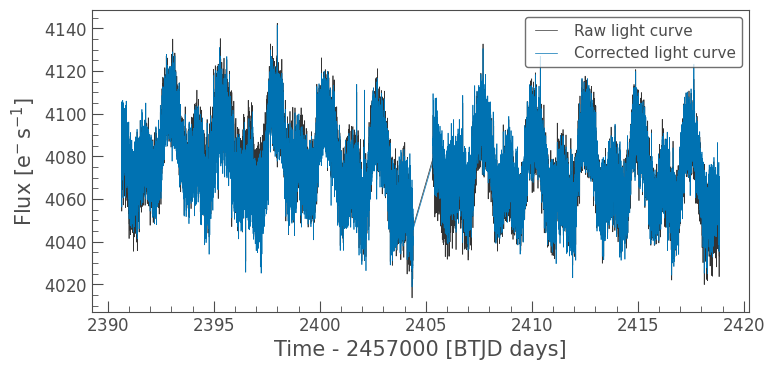

In [48]:
examp.pca()

    index          ra        dec               source          x          y  \
0      20  273.039909  63.495080  2160839724980689408   4.632145   4.464533   
1      14  273.055440  63.493415  2160839523118806272   5.730471   3.863845   
2      19  273.013658  63.496132  2160839729277235712   2.700587   5.173313   
3      16  273.055273  63.480674  2160839484462580864   5.172810   1.644872   
4      18  273.078926  63.494014  2160839626198022272   7.525003   3.499409   
5      21  273.012231  63.511076  2160839901075928576   3.234179   7.807907   
6      15  273.076238  63.484119  2160839518822320000   6.899685   1.827024   
7      17  273.100391  63.489527  2160839557478545792   8.950317   2.288813   
8      13  273.032403  63.466438  2160833819402233344   2.839780  -0.380414   
9      25  273.028660  63.527200  2160840244673314560   5.161525  10.291278   
10     24  273.051688  63.527558  2160840244673315328   6.908991   9.893710   
11     12  273.033982  63.460056  216083378504249446

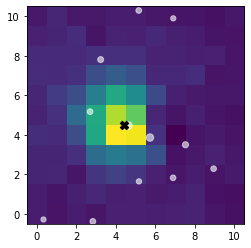

In [49]:
examp.info()

In [59]:
lc = lk.search_lightcurve('TIC 219897252',mission='TESS',author='SPOC').download() 
tp = lk.search_targetpixelfile('TIC 219897252',mission='TESS',author='SPOC').download()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

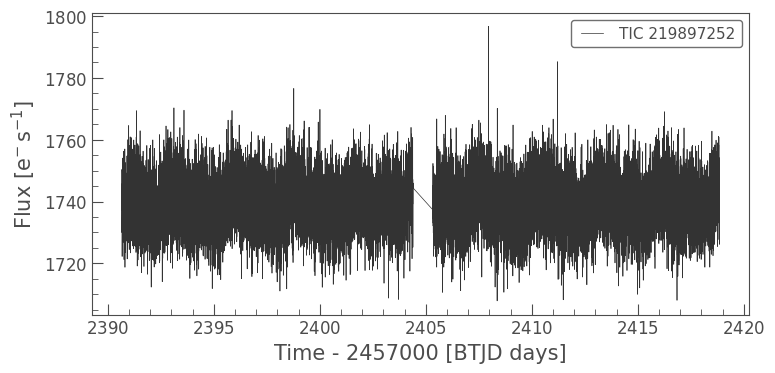

In [60]:
lc.plot()

<AxesSubplot:title={'center':'Target ID: 219897252, Cadence: 837503'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

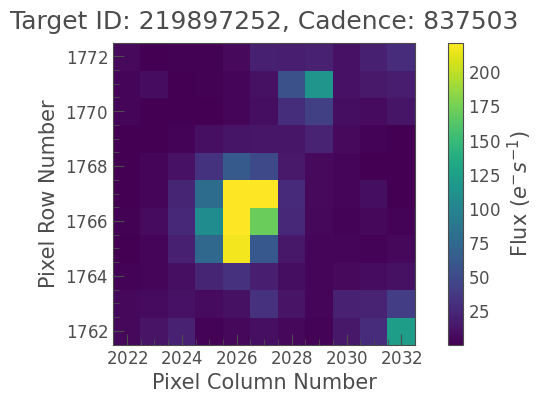

In [61]:
tp.plot()

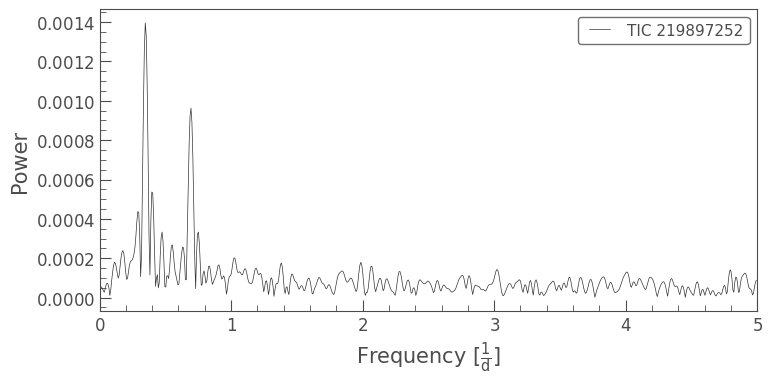

In [67]:
#long period investigation
import matplotlib.pyplot as plt
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',maximum_frequency=5)
pgm.plot()
plt.xlim(0,5)
p1 = pgm.period_at_max_power.value

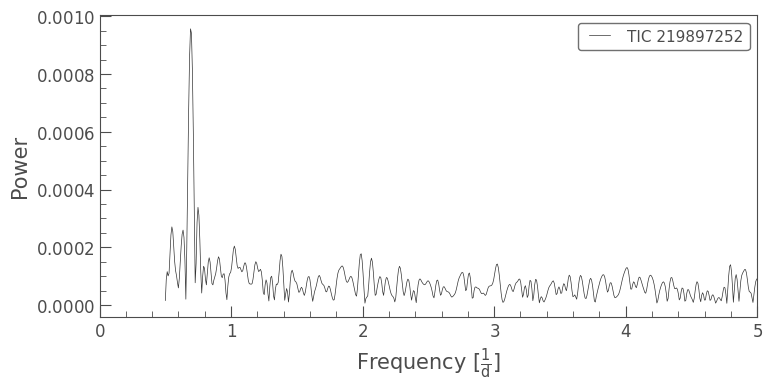

In [68]:
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',maximum_frequency=5, minimum_frequency=.5)
pgm.plot()
plt.xlim(0,5)
p2 = pgm.period_at_max_power.value

In [69]:
frequency = [1/p1,1/p2]

    index          ra        dec               source          x          y  \
0       8  263.219296  71.078629  1651137131123978112   4.305243   4.649341   
1       9  263.221639  71.071761  1651137062404501120   3.958168   3.525294   
2      23  263.246259  71.099272  1651138260699776768   7.066916   7.281871   
3      10  263.261914  71.060019  1651137165483716992   5.201216   0.806569   
4      24  263.228800  71.106715  1651138333714822016   6.689222   8.827258   
5       5  263.206296  71.048851  1651136787526804992   1.628229   0.285117   
6      20  263.188239  71.113119  1651138157620670464   5.075788  10.717407   
7      14  263.105963  71.075477  1651137745303808000  -1.638151   6.653011   
8      19  263.194502  71.116569  1651138161916129920   5.625960  11.118506   
9      25  263.274424  71.116118  1651138368074561024   9.629692   9.296568   
10      1  263.283267  71.044242  1651134210546217472   5.215514  -2.127097   
11     22  263.299911  71.111396  165113829505951590

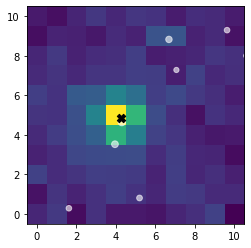

In [70]:
examp = tl.PixelMapFit(targetpixelfile=tp, gaia=True, magnitude_limit=18, frequencies=frequency, frequnit=1/u.day, principal_components = 3)
examp.info()

In [71]:
tp.interact_sky()

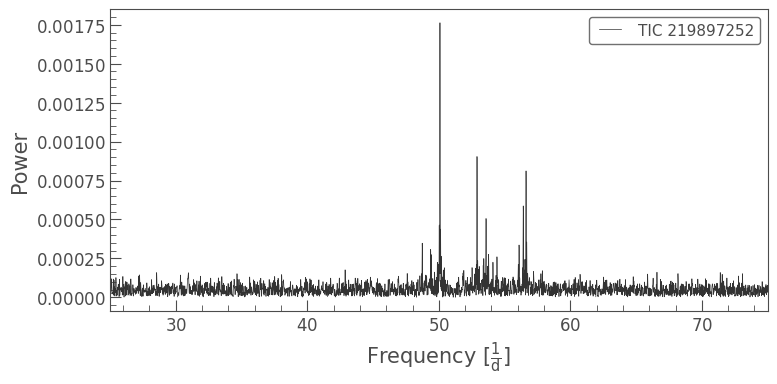

In [81]:
#Short Period
#long period investigation
import matplotlib.pyplot as plt
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',minimum_frequency=5)
pgm.plot()
plt.xlim(25,75)
p3 = pgm.period_at_max_power.value

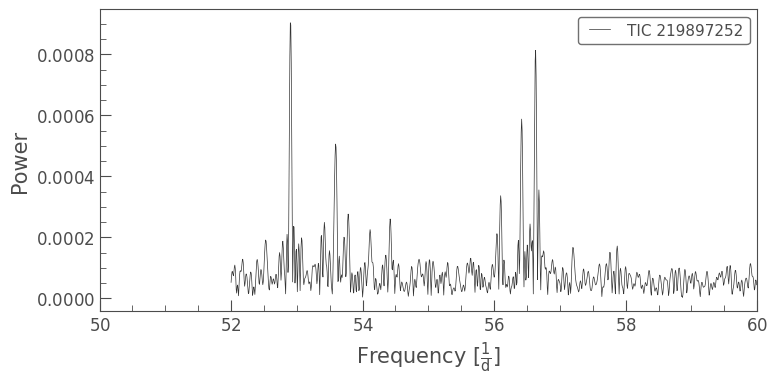

In [82]:
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',minimum_frequency=52,maximum_frequency=60)
pgm.plot()
plt.xlim(50,60)
p4 = pgm.period_at_max_power.value

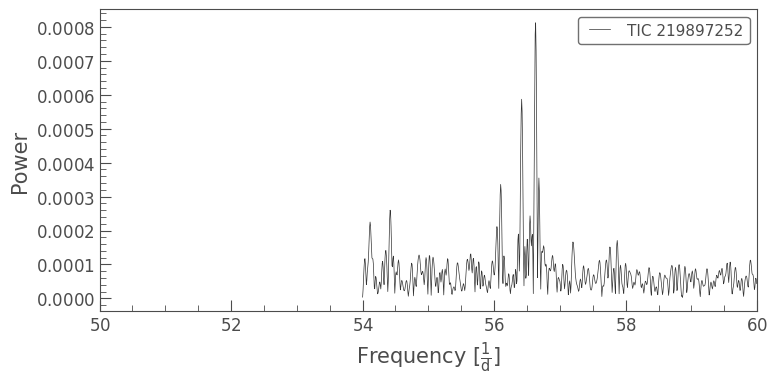

In [83]:
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',minimum_frequency=54,maximum_frequency=60)
pgm.plot()
plt.xlim(50,60)
p5 = pgm.period_at_max_power.value

    index          ra        dec               source          x          y  \
0       8  263.219296  71.078629  1651137131123978112   4.305243   4.649341   
1       9  263.221639  71.071761  1651137062404501120   3.958168   3.525294   
2      23  263.246259  71.099272  1651138260699776768   7.066916   7.281871   
3      10  263.261914  71.060019  1651137165483716992   5.201216   0.806569   
4      24  263.228800  71.106715  1651138333714822016   6.689222   8.827258   
5       5  263.206296  71.048851  1651136787526804992   1.628229   0.285117   
6      20  263.188239  71.113119  1651138157620670464   5.075788  10.717407   
7      14  263.105963  71.075477  1651137745303808000  -1.638151   6.653011   
8      19  263.194502  71.116569  1651138161916129920   5.625960  11.118506   
9      25  263.274424  71.116118  1651138368074561024   9.629692   9.296568   
10      1  263.283267  71.044242  1651134210546217472   5.215514  -2.127097   
11     22  263.299911  71.111396  165113829505951590

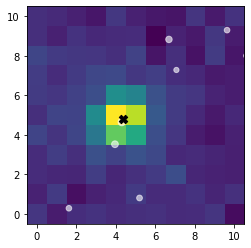

In [78]:
frequency = [1/p3,1/p4,1/p5]
examp = tl.PixelMapFit(targetpixelfile=tp, gaia=True, magnitude_limit=18, frequencies=frequency, frequnit=1/u.day, principal_components = 3)
examp.info()

In [80]:
tp.interact_sky()

    index          ra        dec               source          x          y  \
0       8  263.219296  71.078629  1651137131123978112   4.305243   4.649341   
1       9  263.221639  71.071761  1651137062404501120   3.958168   3.525294   
2      23  263.246259  71.099272  1651138260699776768   7.066916   7.281871   
3      10  263.261914  71.060019  1651137165483716992   5.201216   0.806569   
4      24  263.228800  71.106715  1651138333714822016   6.689222   8.827258   
5       5  263.206296  71.048851  1651136787526804992   1.628229   0.285117   
6      20  263.188239  71.113119  1651138157620670464   5.075788  10.717407   
7      14  263.105963  71.075477  1651137745303808000  -1.638151   6.653011   
8      19  263.194502  71.116569  1651138161916129920   5.625960  11.118506   
9      25  263.274424  71.116118  1651138368074561024   9.629692   9.296568   
10      1  263.283267  71.044242  1651134210546217472   5.215514  -2.127097   
11     22  263.299911  71.111396  165113829505951590

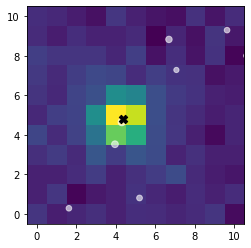

In [84]:
frequency = [1/p1,1/p2,1/p3,1/p4,1/p5]
examp = tl.PixelMapFit(targetpixelfile=tp, gaia=True, magnitude_limit=18, frequencies=frequency, frequnit=1/u.day, principal_components = 3)
examp.info()

In [87]:
lc = lk.search_lightcurve('TIC 32869782',mission='TESS',author='SPOC')[1].download()
tp = lk.search_targetpixelfile('TIC 32869782',mission='TESS',author='SPOC')[1].download()

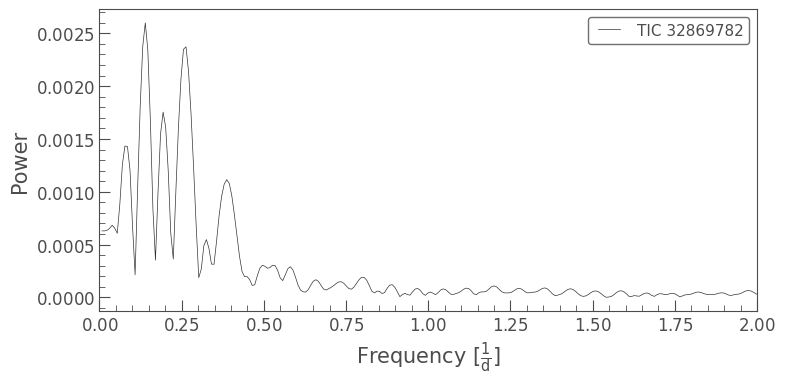

In [91]:
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',maximum_frequency=5)
pgm.plot()
plt.xlim(0,2)
p1 = pgm.period_at_max_power.value

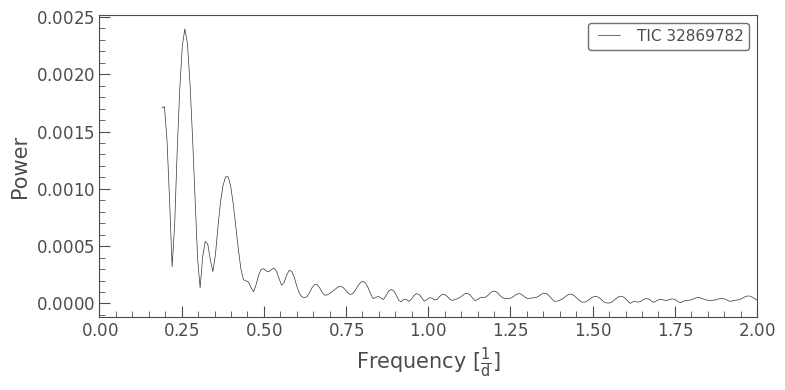

In [92]:
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',minimum_frequency=.19,maximum_frequency=5)
pgm.plot()
plt.xlim(0,2)
p2 = pgm.period_at_max_power.value

    index         ra        dec               source          x          y  \
0      29  87.083389 -24.464054  2915523482424724224   4.534102   4.899533   
1      31  87.082692 -24.471072  2915523448064986624   4.180943   3.707713   
2      30  87.081705 -24.459680  2915523482424723584   4.410657   5.721755   
3      28  87.071766 -24.473010  2915523448064988288   2.343108   3.780941   
4      32  87.086734 -24.449592  2915523551144199168   5.571280   7.283895   
5      17  87.092774 -24.483975  2915522692150742656   5.374163   1.090294   
6      16  87.075316 -24.488775  2915522584774154880   2.379579   0.911784   
7      15  87.079726 -24.492713  2915522584774153216   2.959947   0.062933   
8      26  87.053240 -24.474524  2915523409407846272  -0.712426   4.212497   
9      35  87.050378 -24.461310  2915523619863681024  -0.725098   6.613158   
10     38  87.097872 -24.437626  2915523963461057408   7.786955   8.942707   
11     36  87.053250 -24.440099  2915523791662369920   0.465400 

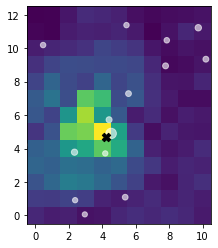

In [93]:
frequency = [1/p1,1/p2]
examp = tl.PixelMapFit(targetpixelfile=tp, gaia=True, magnitude_limit=18, frequencies=frequency, frequnit=1/u.day, principal_components = 3)
examp.info()

In [95]:
lc = lk.search_lightcurve('TIC 219114641',mission='TESS',author='SPOC')[0].download()
tp = lk.search_targetpixelfile('TIC 219114641',mission='TESS',author='SPOC')[0].download()

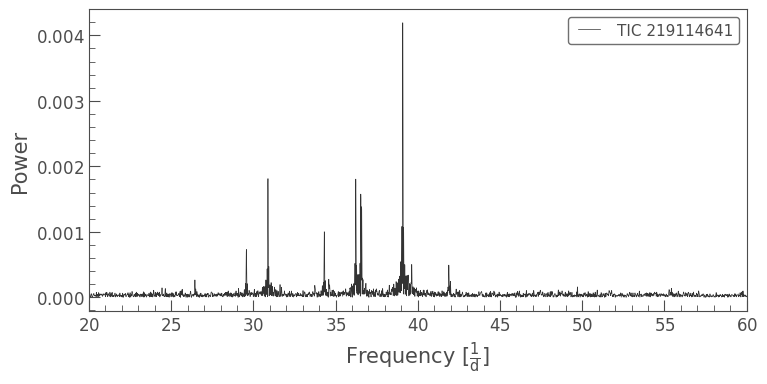

In [101]:
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',minimum_frequency = 1,maximum_frequency=100)
pgm.plot()
plt.xlim(20,60)
p1 = pgm.period_at_max_power.value

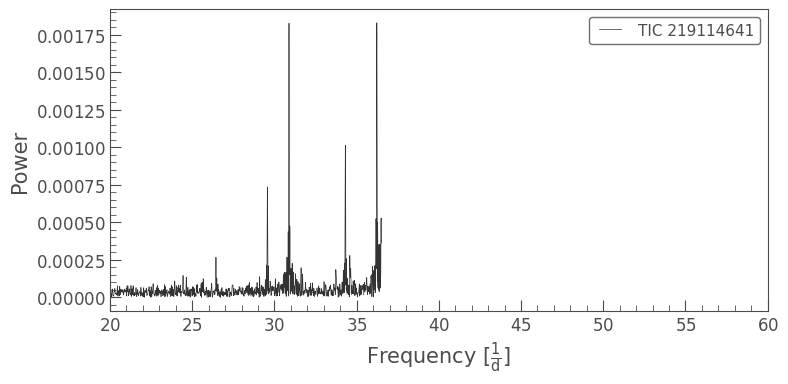

In [102]:
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',minimum_frequency = 1,maximum_frequency=36.5)
pgm.plot()
plt.xlim(20,60)
p2 = pgm.period_at_max_power.value

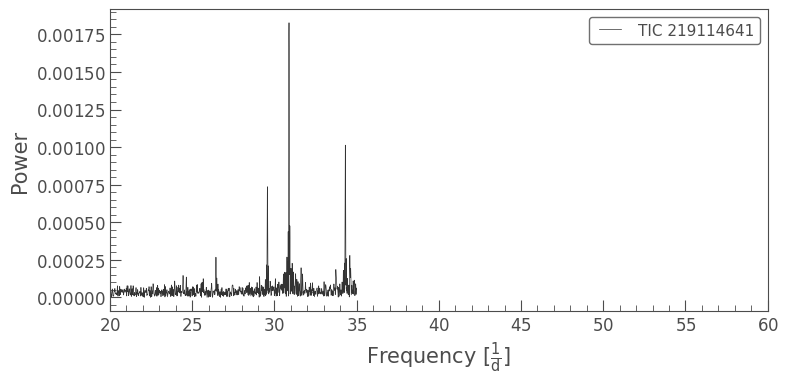

In [104]:
pgm = lc.remove_outliers().normalize().to_periodogram(normalization='amplitude',minimum_frequency = 1,maximum_frequency=35)
pgm.plot()
plt.xlim(20,60)
p3 = pgm.period_at_max_power.value

In [ ]:
frequency = [1/p1,1/p2,1/p3]
examp = tl.PixelMapFit(targetpixelfile=tp, gaia=True, magnitude_limit=18, frequencies=frequency, frequnit=1/u.day, principal_components = 3)
examp.info() 